# **Modelos de Regresión**

Los modelos de regresión son técnicas de aprendizaje supervisado utilizadas para predecir valores numéricos continuos. A diferencia de la clasificación (que predice clases), la regresión responde preguntas como:

- ¿Cuánto será la venta de un producto mañana?
- ¿Cuál será el tiempo de espera en minutos?
- ¿Qué valor en pesos tendrá un pedido?
- ¿Qué porcentaje (0–100) obtendrá un estudiante?

Aprender una función matemática que relacione un conjunto de variables X (características) con un valor numérico y (variable objetivo):

         𝑦 = 𝑓(𝑋)+𝜖y=f(X)+ϵ

donde

* f(X) es el modelo aprendido

* ε es el error o ruido del sistema

## Restaurante — **Predicción de Ventas Diarias**

| Columna              | Tipo      | Descripción                             |
| -------------------- | --------- | --------------------------------------- |
| Fecha              | date      | Día de registro                         |
|`Dia_Semana         | categoría | Lunes, Martes, etc.                     |
| Temperatura        | numérico  | °C del día                              |
| Precipitacion      | numérico  | mm de lluvia                            |
| Promocion          | binaria   | 1 = sí, 0 = no                          |
| Eventos_Cercanos   | entero    | Número de eventos cerca del restaurante |
| Clientes           | entero    | Número de clientes atendidos            |
| Ticket_Promedio    | numérico  | Valor promedio del pedido               |
| Tiempo_Espera_Prom | numérico  | Minutos                                 |
| Ventas_Diarias     | numérico  | **Variable objetivo (y)**               |


In [1]:
# Importe de las Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, learning_curve

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Cargar el Dataset
url = 'https://github.com/aperezn298/CienciaDatosSENA/raw/refs/heads/main/04Datasets/dataset_restaurante_500.csv'
df = pd.read_csv(url)

df.head()

,Fecha,Dia_Semana,Temperatura,Precipitacion,Promocion,Eventos_Cercanos,Clientes,Ticket_Promedio,Tiempo_Espera_Prom,Ventas_Diarias
0,2025-01-01,Domingo,32,3,0,3,343,14.42,5,4946.0
1,2025-01-02,Jueves,28,5,0,0,293,13.21,6,3871.0
2,2025-01-03,Viernes,22,1,1,0,279,15.25,9,4255.0
3,2025-01-04,Domingo,18,9,0,3,158,12.10,8,1912.0
4,2025-01-05,Miércoles,25,4,0,3,252,13.25,8,3339.0


In [3]:
# Divir las caracteristicas de la variable objetivo
X = df.drop("Ventas_Diarias", axis=1).copy()
y = df["Ventas_Diarias"]

In [4]:
# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

In [5]:
# Caracteristicas codificadas
X

,Temperatura,Precipitacion,Promocion,Eventos_Cercanos,Clientes,Ticket_Promedio,Tiempo_Espera_Prom,Fecha_2025-01-02,Fecha_2025-01-03,Fecha_2025-01-04,...,Fecha_2026-05-12,Fecha_2026-05-13,Fecha_2026-05-14,Fecha_2026-05-15,Dia_Semana_Jueves,Dia_Semana_Lunes,Dia_Semana_Martes,Dia_Semana_Miércoles,Dia_Semana_Sábado,Dia_Semana_Viernes
0,32,3,0,3,343,14.42,5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28,5,0,0,293,13.21,6,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,22,1,1,0,279,15.25,9,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,18,9,0,3,158,12.10,8,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,25,4,0,3,252,13.25,8,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,21,5,0,3,295,11.03,5,False,False,False,...,False,False,False,False,False,False,False,False,True,False
496,23,7,0,4,144,12.29,5,False,False,False,...,True,False,False,False,False,True,False,False,False,False
497,18,2,1,3,87,15.23,10,False,False,False,...,False,True,False,False,True,False,False,False,False,False
498,22,7,1,2,155,13.95,9,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [6]:
# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Caracteristicas escaladas
X_train_scaled

array([[ 1.64474637,  0.52272288,  0.92295821, ..., -0.37363236,
         2.53128572, -0.36927447],
       [-0.14518317,  1.54934721, -1.08347268, ...,  2.67642771,
        -0.39505615, -0.36927447],
       [-0.74182636, -0.50390144,  0.92295821, ..., -0.37363236,
        -0.39505615, -0.36927447],
       ...,
       [ 0.45146001, -1.18831765, -1.08347268, ..., -0.37363236,
        -0.39505615, -0.36927447],
       [-1.5373506 ,  0.86493099,  0.92295821, ..., -0.37363236,
        -0.39505615, -0.36927447],
       [-0.34406424,  0.52272288,  0.92295821, ..., -0.37363236,
        -0.39505615, -0.36927447]])

In [9]:
# Crear los modelos de regresion

regresions = {
    "Regresión Lineal": LinearRegression(),
    "Árbol de Regresión": DecisionTreeRegressor(random_state=42),
    "Extra Trees": ExtraTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

In [10]:
# Entrenar los modelos de regresion

resultados_train = {}

for name, model in regresions.items():
    # Entrenar
    model.fit(X_train_scaled, y_train)

    # Predicciones en train y test
    y_train_pred = model.predict(X_train_scaled)

    # Métricas train
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Guadar las metricas
    resultados_train[name] = {
        "MAE": mae_train,
        "RMSE": rmse_train,
        "R2": r2_train
    }

In [11]:
# Mostrar los resultados del entrenamiento
resultados_train_df = pd.DataFrame(resultados_train).T
resultados_train_df.sort_values(by="R2", ascending=False)

,MAE,RMSE,R2
Regresión Lineal,1.282956e-12,2.961177e-24,1.000000
Árbol de Regresión,0.000000e+00,0.000000e+00,1.000000
Extra Trees,0.000000e+00,0.000000e+00,1.000000
Random Forest,2.569440e+01,1.217929e+03,0.998892
K-Nearest Neighbors,3.764190e+02,2.166866e+05,0.802892
Support Vector Machine,8.765659e+02,1.104388e+06,-0.004603


In [12]:
# Predecir los modelos de regresion

resultados_test = {}

for name, model in regresions.items():
    # Predicciones en train y test
    y_test_pred = model.predict(X_test_scaled)

    # Métricas test
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Guadar las metricas
    resultados_test[name] = {
        "MAE": mae_test,
        "RMSE": rmse_test,
        "R2": r2_test
    }

In [13]:
# Mostrar los resultados del prueba
resultados_test_df = pd.DataFrame(resultados_test).T
resultados_test_df.sort_values(by="R2", ascending=False)

,MAE,RMSE,R2
Random Forest,61.911500,7.019130e+03,0.992977
Árbol de Regresión,129.150000,2.742811e+04,0.972557
Extra Trees,122.230000,3.005689e+04,0.969927
Regresión Lineal,432.736328,2.775403e+05,0.722307
K-Nearest Neighbors,500.008000,3.730283e+05,0.626766
Support Vector Machine,867.810316,1.037925e+06,-0.038498


In [14]:
# Diagnóstico simple de ajuste de los modelos

estado_modelos = {}

for name, model in regresions.items():
    r2_train = resultados_train[name]["R2"]
    r2_test = resultados_test[name]["R2"]
    if (r2_train < 0.5) and (r2_test < 0.5):
        diagnostico = "Posible SUBAJUSTE (modelo demasiado simple)."
    elif (r2_train - r2_test > 0.15) and (r2_train > 0.7):
        diagnostico = "Posible SOBREAJUSTE (overfitting)."
    else:
        diagnostico = "Modelo con ajuste razonable (sin señales fuertes de sobre/subajuste)."

    estado_modelos[name] = diagnostico

In [15]:
# Resultados del Diagnóstico simple de ajuste de los modelos
pd.Series(estado_modelos)

Regresión Lineal                         Posible SOBREAJUSTE (overfitting).
Árbol de Regresión        Modelo con ajuste razonable (sin señales fuert...
Extra Trees               Modelo con ajuste razonable (sin señales fuert...
Random Forest             Modelo con ajuste razonable (sin señales fuert...
Support Vector Machine         Posible SUBAJUSTE (modelo demasiado simple).
K-Nearest Neighbors                      Posible SOBREAJUSTE (overfitting).
dtype: object

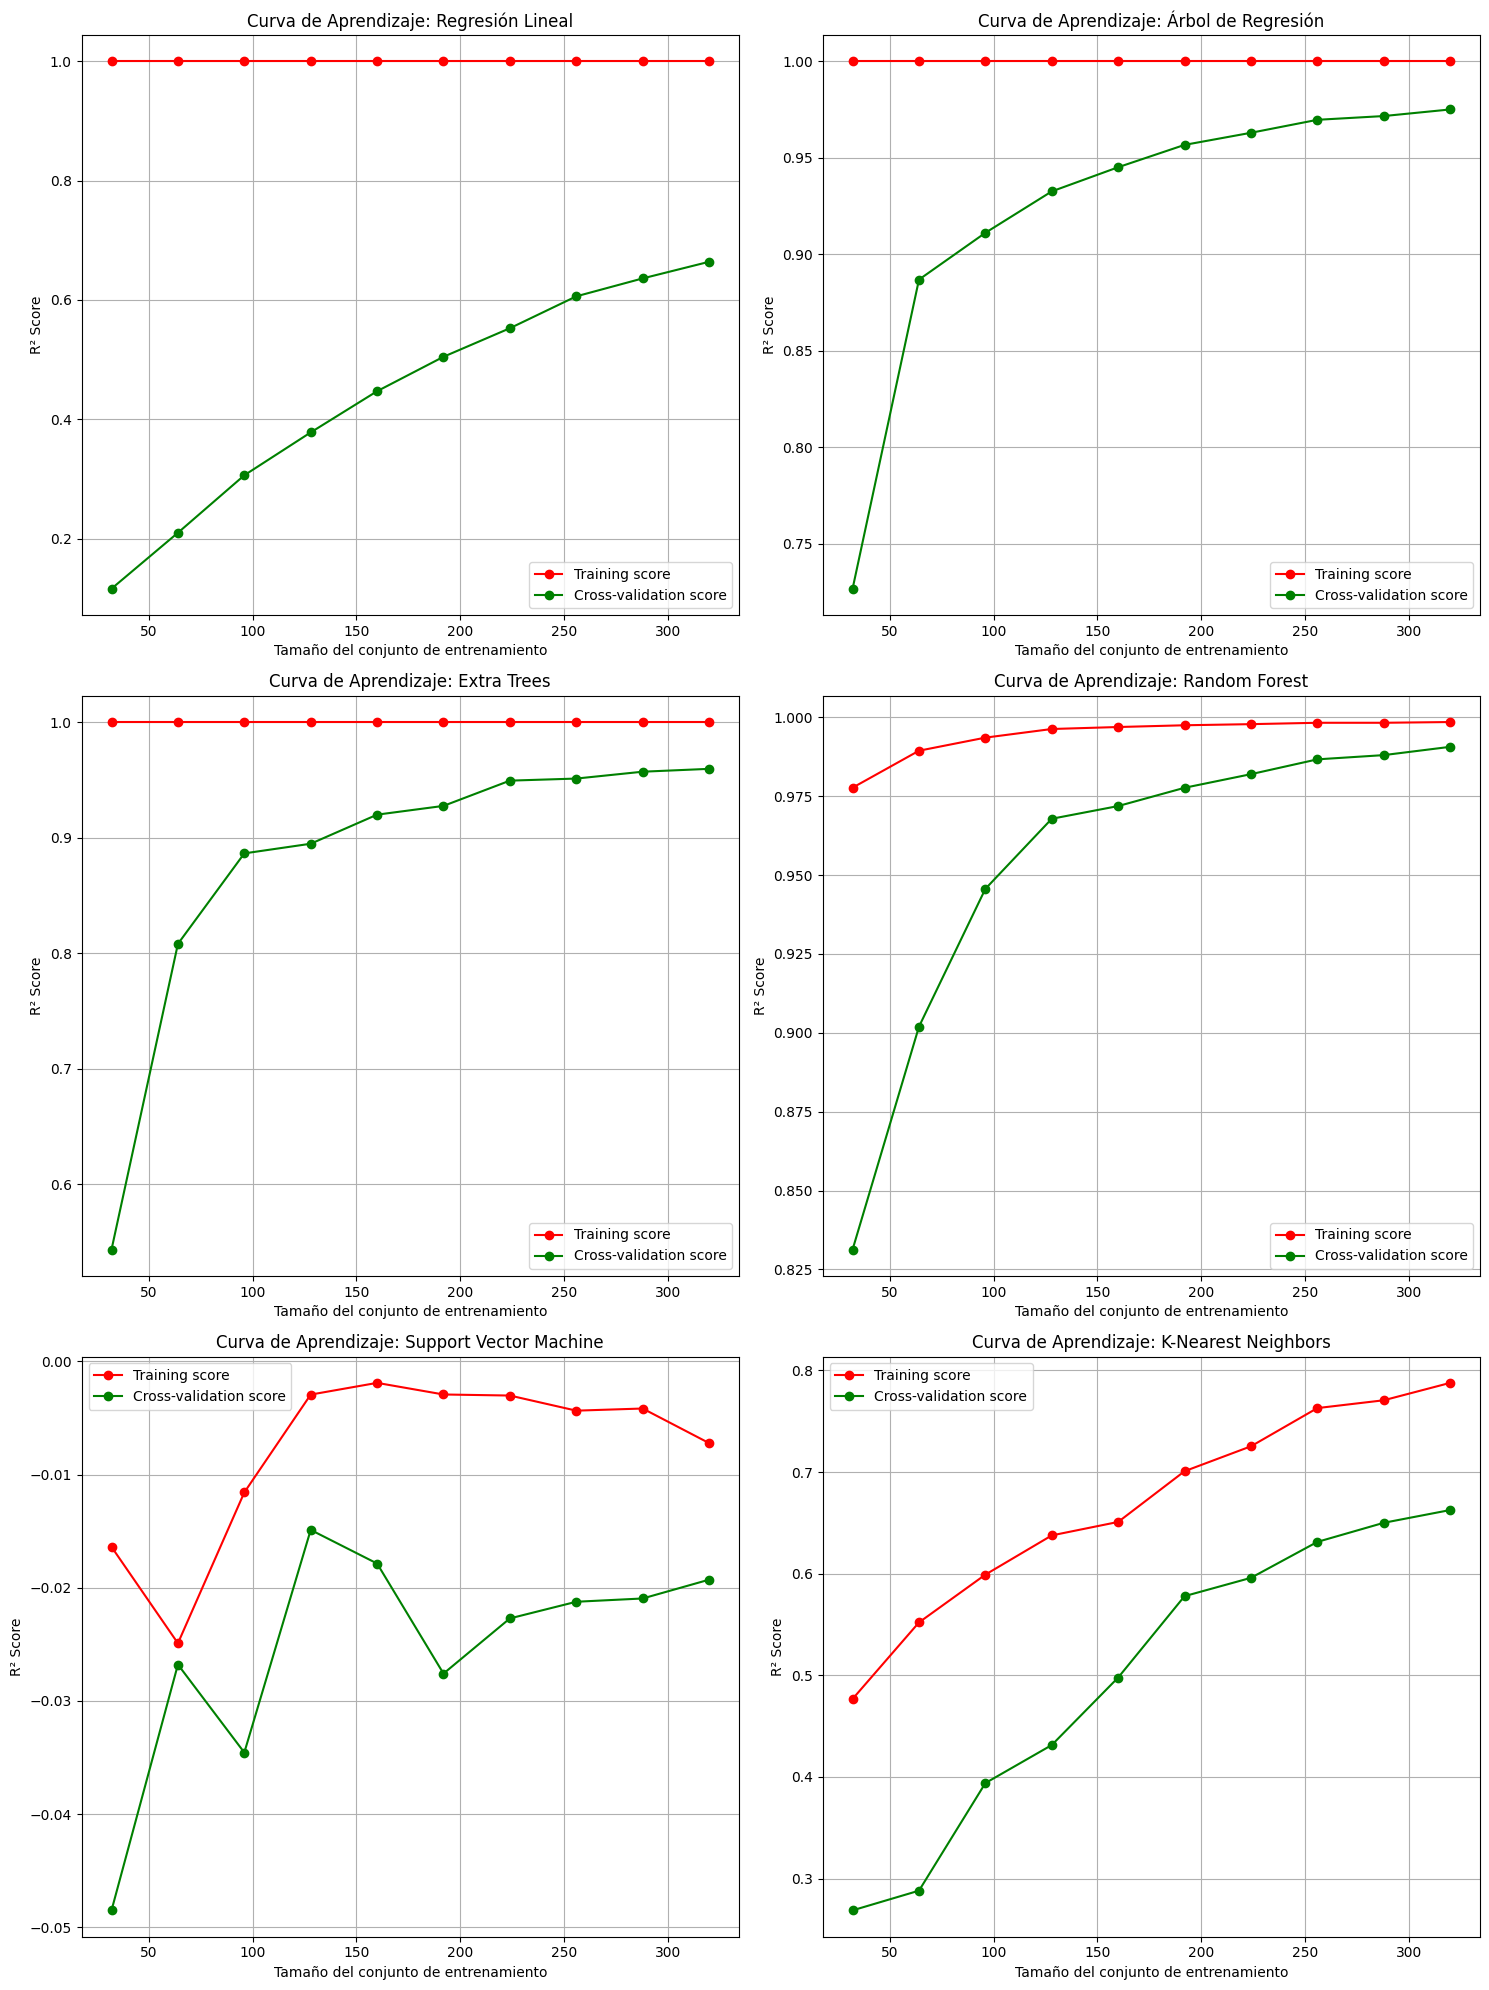

In [16]:
# Grafica tipo subplot de curvas de aprendizaje de todos los modelos
plt.figure(figsize=(15, 20))
for i, (name, model) in enumerate(regresions.items(), 1):
    plt.subplot(3, 2, i)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_scaled, y_train, cv=5, scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.title(f'Curva de Aprendizaje: {name}')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('R² Score')
    plt.legend(loc='best')
    plt.grid()
    
plt.tight_layout()
plt.show()

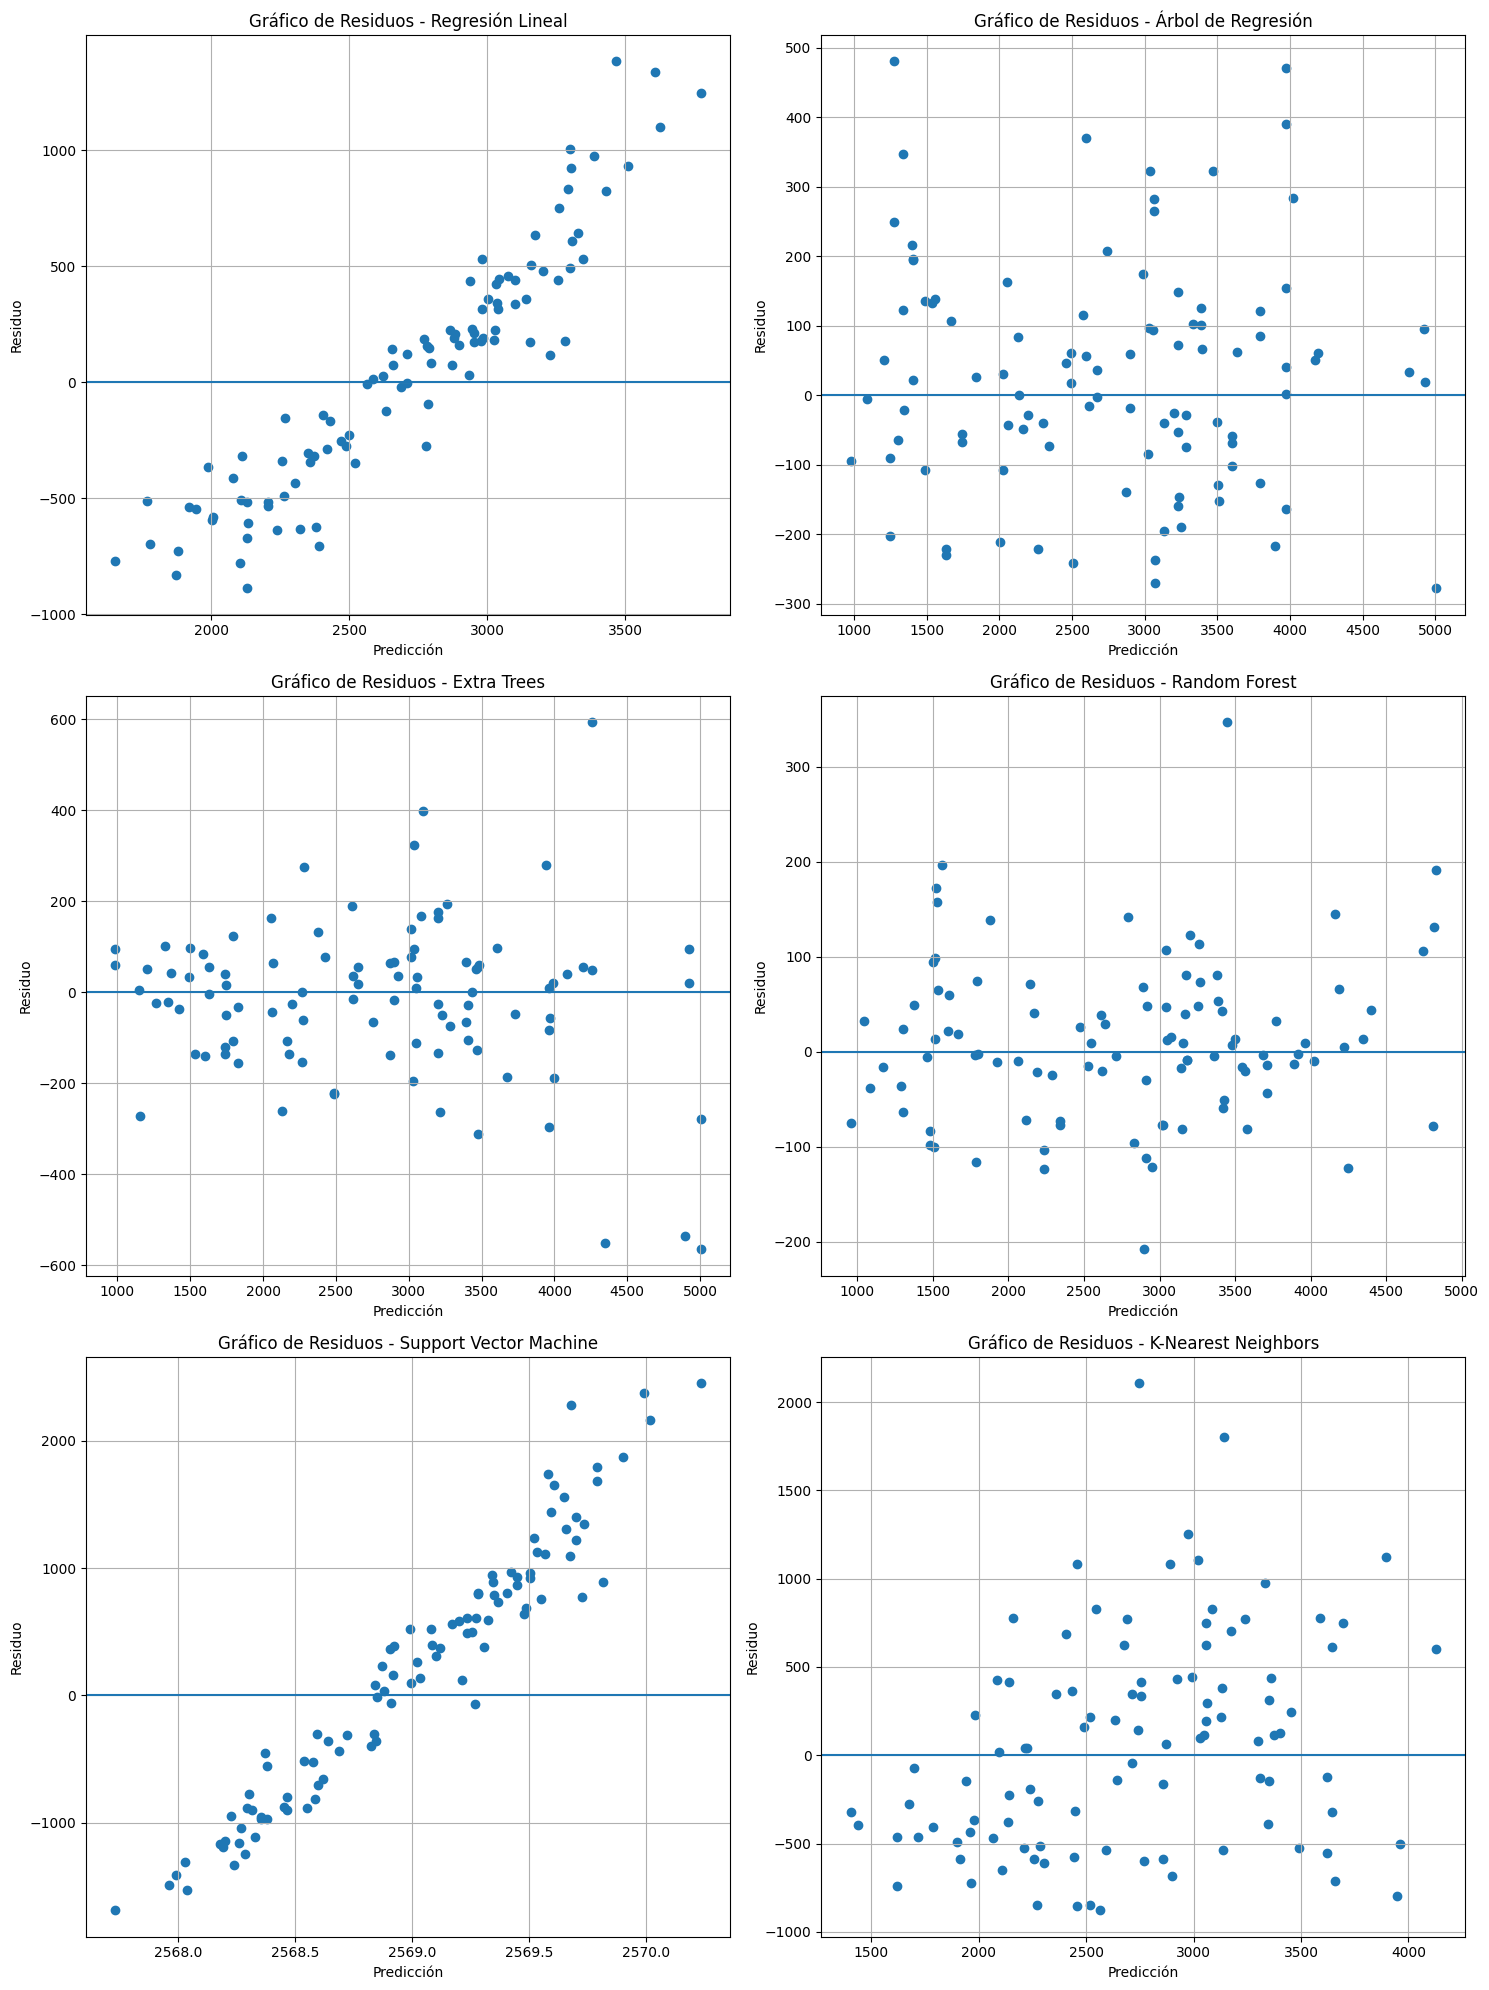

In [ ]:
# Grafica de subplot de residuos de todos los modelos
plt.figure(figsize=(15, 20))
for i, (name, model) in enumerate(regresions.items(), 1):
    plt.subplot(3, 2, i)
    y_pred = model.predict(X_test_scaled)
    residuos = y_test - y_pred

    plt.scatter(y_pred, residuos)
    plt.axhline(0)
    plt.xlabel("Predicción")
    plt.ylabel("Residuo")
    plt.title(f"Gráfico de Residuos - {name}")
    plt.grid()
plt.tight_layout()
plt.show()